In [1]:
pip install CTGANENN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu1

In [2]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/insurance.csv')

#transform data into numeric value
df1=df[df['labels']==0]
df=df[df['labels']==1]

In [3]:
from ctganenn import CTGANENN

X,y=CTGANENN(df,df1,25974,'labels')

Gen. (-2.16) | Discrim. (0.04): 100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


In [4]:
# define model
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# define grid
balance = [{0:10,1:100},{0:20,1:100},{0:30,1:100},{0:40,1:100},{0:50,1:100},{0:60,1:100},{0:70,1:100},{0:80,1:100},{0:90,1:100},{0:100,1:100}]
#balance = [{0:100,1:10},{0:100,1:20},{0:100,1:30},{0:100,1:40},{0:100,1:50},{0:100,1:60},{0:100,1:70},{0:100,1:80},{0:100,1:90},{0:100,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978075 using {'class_weight': {0: 20, 1: 100}}
0.977428 (0.001446) with: {'class_weight': {0: 10, 1: 100}}
0.978075 (0.001313) with: {'class_weight': {0: 20, 1: 100}}
0.977959 (0.001274) with: {'class_weight': {0: 30, 1: 100}}
0.977844 (0.001275) with: {'class_weight': {0: 40, 1: 100}}
0.977856 (0.001475) with: {'class_weight': {0: 50, 1: 100}}
0.977302 (0.001458) with: {'class_weight': {0: 60, 1: 100}}
0.977396 (0.001594) with: {'class_weight': {0: 70, 1: 100}}
0.977131 (0.001684) with: {'class_weight': {0: 80, 1: 100}}
0.977195 (0.001696) with: {'class_weight': {0: 90, 1: 100}}
0.977599 (0.001590) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('DT-insurance-ctgan-auc-fn.xlsx', index=False)

In [9]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=f1)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926449 using {'class_weight': {0: 60, 1: 100}}
0.912894 (0.053512) with: {'class_weight': {0: 10, 1: 100}}
0.916441 (0.056912) with: {'class_weight': {0: 20, 1: 100}}
0.923141 (0.047963) with: {'class_weight': {0: 30, 1: 100}}
0.919681 (0.060360) with: {'class_weight': {0: 40, 1: 100}}
0.923039 (0.057712) with: {'class_weight': {0: 50, 1: 100}}
0.926449 (0.054518) with: {'class_weight': {0: 60, 1: 100}}
0.919664 (0.057524) with: {'class_weight': {0: 70, 1: 100}}
0.916339 (0.057121) with: {'class_weight': {0: 80, 1: 100}}
0.919698 (0.054522) with: {'class_weight': {0: 90, 1: 100}}
0.923056 (0.051574) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('DT-insurance-ctgan-f1-fn.xlsx', index=False)

In [ ]:
from imblearn.metrics import geometric_mean_score
gm_scorer = make_scorer(geometric_mean_score, greater_is_better=True, average='binary')

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring=gm_scorer)
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977941 using {'class_weight': {0: 90, 1: 100}}
0.976959 (0.001822) with: {'class_weight': {0: 10, 1: 100}}
0.976714 (0.001656) with: {'class_weight': {0: 20, 1: 100}}
0.977126 (0.001225) with: {'class_weight': {0: 30, 1: 100}}
0.977449 (0.001732) with: {'class_weight': {0: 40, 1: 100}}
0.977804 (0.001520) with: {'class_weight': {0: 50, 1: 100}}
0.977631 (0.001503) with: {'class_weight': {0: 60, 1: 100}}
0.977701 (0.001550) with: {'class_weight': {0: 70, 1: 100}}
0.977925 (0.001495) with: {'class_weight': {0: 80, 1: 100}}
0.977941 (0.001384) with: {'class_weight': {0: 90, 1: 100}}
0.977580 (0.001541) with: {'class_weight': {0: 100, 1: 100}}


In [ ]:
# Create a DataFrame with the results
results_df = pd.DataFrame(grid_result.cv_results_)

# Save the DataFrame to an Excel file
results_df.to_excel('DT-insurance-ctgan-gmean-fn.xlsx', index=False)

In [ ]:
#experiment on LR without CTGAN

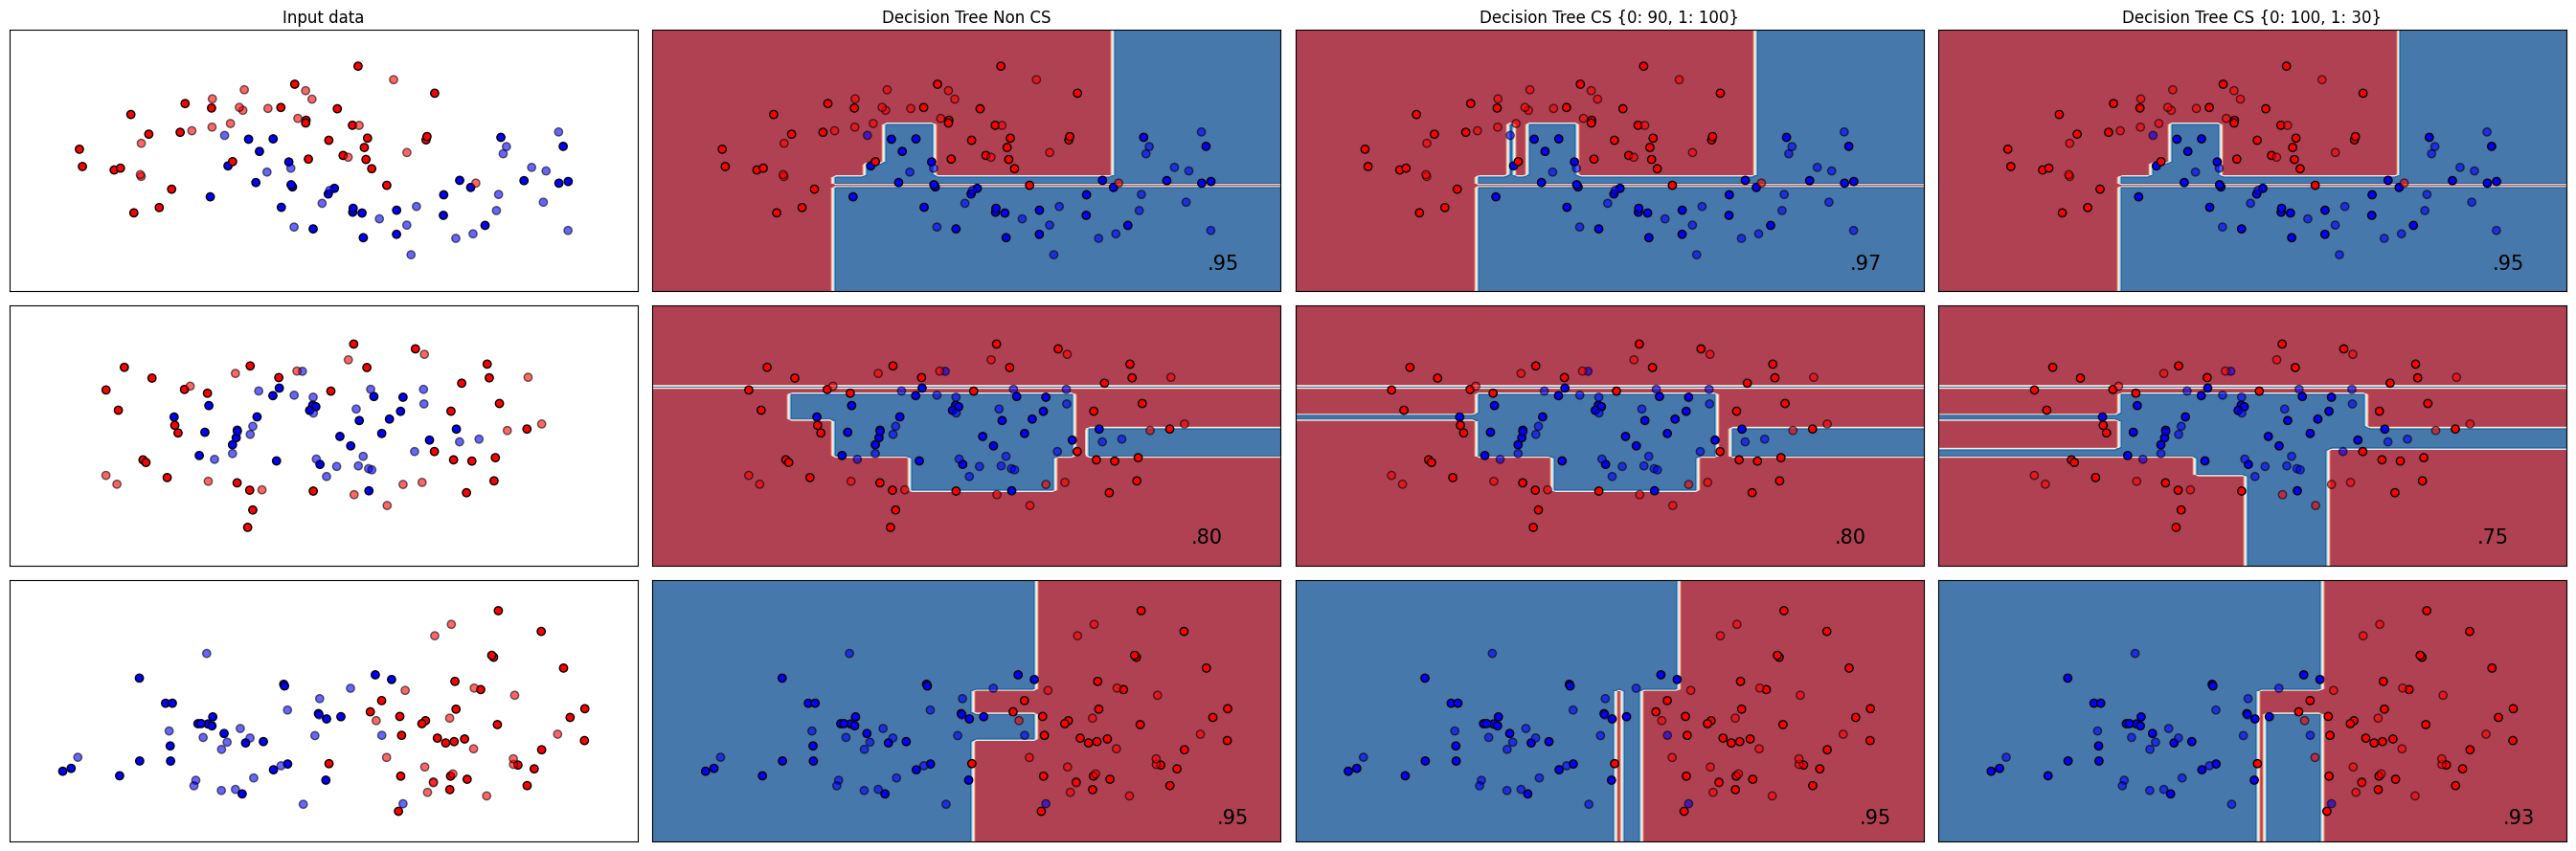

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler


names = [
    "Decision Tree Non CS",
    "Decision Tree CS {0: 90, 1: 100}",
    "Decision Tree CS {0: 100, 1: 30}",
]

classifiers = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(class_weight={0: 90, 1: 100}),
    DecisionTreeClassifier(class_weight={0: 100, 1: 30})
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()